In [1]:
import os
import numpy as np
import pandas as pd
from glob import glob
from datetime import datetime
import scipy as sp
import scipy.optimize as op
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import gridspec
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
from scipy.stats import norm
from scipy.special import factorial

%matplotlib inline

In [2]:
start = np.loadtxt("data_start.dat")

In [3]:
#Define the Gaussian function
def gauss(x, A, x0, sigma):
    return A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))

NameError: name 'fit_function' is not defined

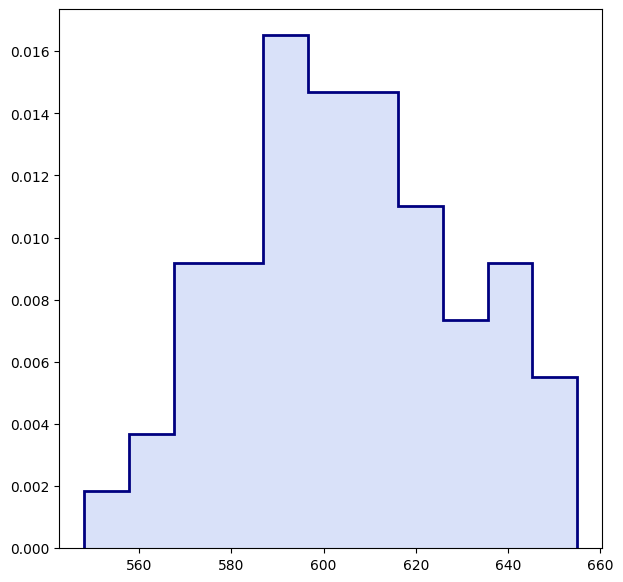

In [6]:
fig, ax = plt.subplots(figsize=(7, 7))

ax.hist(start, fc='royalblue', alpha=0.2, label='START', bins=11, density=True)
n, bins , _ = ax.hist(start, histtype='step', ec='navy', lw=2, bins=11,  density=True)

# array of bin centers
x = np.array([0.5 * (bins[i] + bins[i+1]) for i in range(len(bins) - 1)])

# set Poisson uncertainty on each bin   
poisson_err =  np.sqrt(n)  

# bin width 
bin_width = bins[1] - bins[0]

# fit with curve_fit
parameters, cov_matrix = op.curve_fit(fit_function, xdata=x, ydata=n, p0=600)

# plot poisson-deviation with fitted parameter
x_plot = np.arange(x.min(),x.max(),100)

ax.plot(x_plot,fit_function(x_plot, *parameters), linestyle='-',label='Fit result')

ax.errorbar(x, n, yerr=poisson_err, label='Data points', marker = 'o',markerfacecolor = 'black',
                                markeredgecolor = 'black',markersize=5, lw = 0, ecolor='black', elinewidth=2, capsize=2)

# ticks
ax.tick_params(which='major', right=False, width=1.0, length=8, direction="in", labelsize=12)
ax.tick_params(which='minor', right=False, width=1.0, length=4, direction="in", labelsize=12)
ax.xaxis.set_minor_locator(AutoMinorLocator(0.1))
ax.yaxis.set_minor_locator(AutoMinorLocator(0.25))

# labels
ax.set_xlabel("START rate [Hz]", fontsize=14)
ax.set_ylabel("Counts / %1.1f Hz"%bin_width, fontsize=14)

# legend
ax.legend(loc=0, frameon=False, fontsize=14)

plt.show()

In [8]:
import numpy as np
y = np.argmax(x)

In [10]:
n[y]

0.005507343124165543